In [ ]:
 #Importing libraries
import keras
from keras.models import Sequential  
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout #Importing Layers for vgg16 to be used in vgg19
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt

In [ ]:
#Path of Train,testing and validation directories and saving them in variables.
train_data_dir = r"/content/drive/MyDrive/prepro/clahee/train"   #Train Path
valid_data_dir = r"/content/drive/MyDrive/prepro/clahee/test"     #Validation Path
test_data_dir = r"/content/drive/MyDrive/prepro/clahee/valid"     #Testing Path

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255)
datagentrain = ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,rotation_range=90)

train_batches = datagentrain.flow_from_directory(directory=train_data_dir, target_size=(224,224), batch_size=20,shuffle=True)   #1500 images , 1500/32 = 47(Steps per Epoch)
valid_batches = datagen.flow_from_directory(directory=valid_data_dir, target_size=(224,224), batch_size=20)
test_batches = datagen.flow_from_directory(directory=test_data_dir, target_size=(224,224), batch_size=20)

Found 49 images belonging to 2 classes.
Found 31 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [ ]:
#---------------------------------------------------------------------------------------
# add preprocessing layer to the front of VGG
#include_top=False argument is to load a network that doesn't include the classification layers at the top
#vgg = VGG16(include_top=False, weights=None, input_shape= (224,224,3))
#---------------------------------------------------------------------------------------------------------


#Here we are manually adding layers OR we could have used above 'commented' code for adding layers and using only 4 layers
#Extra 19 layers have been added
model = Sequential()   #Sequential model means that all the layers of the model will be arranged in sequence

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(units=2, activation="softmax")) #units = '2' because we have are working on 2 classes

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_33 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_35 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [ ]:
# Mentioning the model what cost and optimization method to use
model.compile(optimizer=Adam(learning_rate=1e-5),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit_generator(generator=train_batches,validation_data=test_batches,validation_steps=len(test_batches),steps_per_epoch=1,epochs=100,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
1/1 [==============================] - 40s 40s/step - loss: 0.6932 - accuracy: 0.3333 - val_loss: 0.6931 - val_accuracy: 0.6190
Epoch 2/100
1/1 [==============================] - 35s 35s/step - loss: 0.6930 - accuracy: 1.0000 - val_loss: 0.6930 - val_accuracy: 0.6190
Epoch 3/100
1/1 [==============================] - 62s 62s/step - loss: 0.6931 - accuracy: 0.5500 - val_loss: 0.6929 - val_accuracy: 0.6190
Epoch 4/100
1/1 [==============================] - 35s 35s/step - loss: 0.6928 - accuracy: 0.6667 - val_loss: 0.6928 - val_accuracy: 0.6190
Epoch 5/100
1/1 [==============================] - 61s 61s/step - loss: 0.6926 - accuracy: 0.7500 - val_loss: 0.6928 - val_accuracy: 0.6190
Epoch 6/100
1/1 [==============================] - 63s 63s/step - loss: 0.6925 - accuracy: 0.7000 - val_loss: 0.6926 - val_accuracy: 0.6190
Epoch 7/100
1/1 [==============================] - 37s 37s/step - loss: 0.6925 - accuracy: 0.6667 - val_loss: 0.6925 - val_accuracy: 0.6190
Epoch 8/100
1/1 [===

In [ ]:
from tensorflow.keras.models import load_model

model.save("/content/drive/MyDrive/Drishtivgg19_updated.h5")

In [ ]:
test_loss, test_acc = model.evaluate(test_batches, verbose=1)
print("\nTest accuracy:", test_acc)

2/2 [==============================] - 21s 750ms/step - loss: 0.6755 - accuracy: 0.6190

Test accuracy: 0.6190476417541504


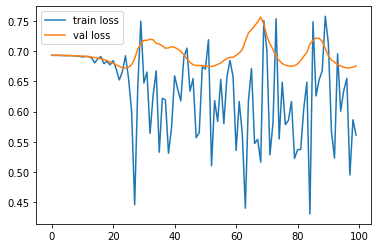

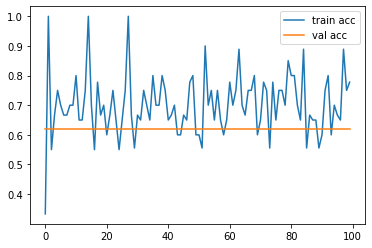

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

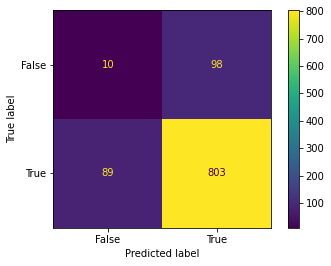

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()